In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import contractions


# Chargement des fichiers CSV

In [2]:
df_fake= pd.read_csv("Fake.csv")
df_news= pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fake["label"]=0
df_news["label"]=1

df=pd.concat([df_news,df_fake],axis=0)

In [6]:
import sklearn
#Random permutation
df=sklearn.utils.shuffle(df).reset_index()[["text","label"]]

In [7]:
df.head()

,text,label
0,BERLIN (Reuters) - German President Frank-Walt...,1
1,After Donald Trump gave out Lindsey Graham s c...,0
2,President Donald Trump targeted former FBI Dir...,0
3,(Reuters) - A federal judge refused to dismiss...,1
4,BEIJING/WASHINGTON (Reuters) - China lodged a ...,1


In [8]:
df["len"]=df["text"].apply(lambda x : len(x))

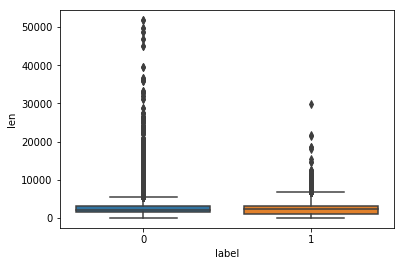

In [9]:
sns.boxplot(x="label",y="len",data=df)

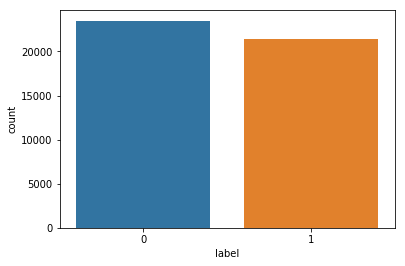

In [10]:
sns.countplot(x="label",data=df)

# Prétraitement

In [11]:
import re
df["text"]=df["text"].apply(lambda x: x.lower())
df["text"]=df["text"].apply(lambda x: contractions.fix(x))
df["text"]=df["text"].apply(lambda x: re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',' ', x))

In [12]:
df["text"]

0        berlin (reuters) - german president frank-walt...
1        after donald trump gave out lindsey graham s c...
2        president donald trump targeted former fbi dir...
3        (reuters) - a federal judge refused to dismiss...
4        beijing/washington (reuters) - china lodged a ...
5        seoul (reuters) - the leaders of south korea a...
6        (reuters) - highlights of the day for  ’s admi...
7        dubai (reuters) - a group of 13 human rights o...
8        brian mast scorched the democrats for their ly...
9        how bad is trump for the gop? it seems he s wo...
10       washington (reuters) - the white house said th...
11       red states from coast to coast have been engag...
12       washington (reuters) -  , vowing “this will no...
13       washington (reuters) - eight months into his l...
14       this is just one of literally thousands of lib...
15       so much for the scotus not being political che...
16       despite the fact that msnbc s morning joe s ma.

In [13]:
import nltk
nltk.download('wordnet')

def stemming(corpus):
    
    corpus_=""
    
    ps = nltk.stem.porter.PorterStemmer()
    for mot in corpus.split():
        corpus_=corpus_ + " " + ps.stem(mot) + " "
        
    return corpus_

def lemmatisation(corpus):
    corpus_=""
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    for mot in corpus.split():
        corpus_=corpus_ + " " + lem.lemmatize(mot) + " "
    return corpus_

[nltk_data] Downloading package wordnet to /Users/assef/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df["text"]=df["text"].apply(lambda x: stemming(x))
df["text"]=df["text"].apply(lambda x: lemmatisation(x))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tokenization 

vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
X=vectorizer.fit_transform(df["text"])
Y=df["label"]

# Modélisation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
MB=MultinomialNB()
MB.fit(X_train,y_train)
y_pred=MB.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

accuracy 0.929086859688196
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5915
           1       0.93      0.92      0.93      5310

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225

Confusion Matrix: 
 [[5520  395]
 [ 401 4909]]


In [17]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

accuracy 0.9893986636971047
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5915
           1       0.99      0.99      0.99      5310

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

Confusion Matrix: 
 [[5846   69]
 [  50 5260]]
